In [11]:
library(ggplot2)
library(tidyverse)
library(data.table)
source("C:\\Users\\harsh\\OneDrive\\Desktop\\DCU\\DCU_Reserch_Paper\\Code\\Practicum_ Adversarial Decision-making of LLMs-20250513T123046Z-001\\Practicum_ Adversarial Decision-making of LLMs\\adv_LLM_NIPS\\bandit\\R\\utils\\helper.R")
source("C:\\Users\\harsh\\OneDrive\\Desktop\\DCU\\DCU_Reserch_Paper\\Code\\Practicum_ Adversarial Decision-making of LLMs-20250513T123046Z-001\\Practicum_ Adversarial Decision-making of LLMs\\adv_LLM_NIPS\\bandit\\R\\utils\\summary_utils.R")


human_dynamic = read.csv("C:\\Users\\harsh\\OneDrive\\Desktop\\DCU\\DCU_Reserch_Paper\\Code\\Practicum_ Adversarial Decision-making of LLMs-20250513T123046Z-001\\Practicum_ Adversarial Decision-making of LLMs\\adv_LLM_NIPS\\bandit\\human_data\\merged_dynamic.csv") ## 97 subjects
human_static = read.csv("C:\\Users\\harsh\\OneDrive\\Desktop\\DCU\\DCU_Reserch_Paper\\Code\\Practicum_ Adversarial Decision-making of LLMs-20250513T123046Z-001\\Practicum_ Adversarial Decision-making of LLMs\\adv_LLM_NIPS\\bandit\\human_data\\merged_static.csv") ## 387 subjects
human_combined = rbind(human_dynamic, human_static)
human_combined$X = NULL
colnames(human_combined) = c("choice", "outcome", "subjID", "block", "schedule_type")
gpt_data = read.csv('img_data\\img_gpt_4_vision.csv')
gpt_data$X = NULL
colnames(gpt_data) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")
gpt_data$subjID <- paste(gpt_data$subjID, "gpt", sep="-")

# gpt4_data = read.csv('sim_data/gpt/gpt-4-turbo.csv')
# gpt4_data$X = NULL
# colnames(gpt4_data) = c("subjID", "trial", "choice", "outcome", "probsX", "probsY")
# gpt4_data$subjID <- paste(gpt4_data$subjID, "gpt-4", sep="-")


## reward
human_reward_sum <- human_combined %>%
  group_by(subjID) %>%
  summarise(reward = sum(outcome, na.rm = TRUE))
human_reward_sum['subject'] = "Human"

gpt_reward_sum <- gpt_data %>%
  group_by(subjID) %>%
  summarise(reward = sum(outcome, na.rm = TRUE))
gpt_reward_sum['subject'] = "GPT-3.5"
# gpt4_reward_sum <- gpt4_data %>%
#   group_by(subjID) %>%
#   summarise(reward = sum(outcome, na.rm = TRUE))
# gpt4_reward_sum['subject'] = "GPT-4"
reward_sum = rbind(human_reward_sum, gpt_reward_sum)



## percentage of choosing each option
human_choice_counts <- human_combined %>%
  group_by(subjID) %>%
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
GPT_choice_counts <- gpt_data %>% 
  group_by(subjID) %>% 
  summarise(X = sum(choice == "0"),
            Y = sum(choice == "1"))
# GPT4_choice_counts <- gpt4_data %>% 
#   group_by(subjID) %>% 
#   summarise(X = sum(choice == "0"),
#             Y = sum(choice == "1"))

choice_counts = rbind(human_choice_counts, GPT_choice_counts)

## shift rate
human_table <- as.data.table(human_combined)
human_list = frame2list(human_table)
human_shift = loss_shift_fun(human_list)
human_df = data.frame(subjID = unique(human_table$subjID),
                      loss_shift = human_shift$loss_mean_sub, 
                      reward_shift = human_shift$reward_mean_sub)
GPT_table <- as.data.table(gpt_data)
GPT_list = frame2list(GPT_table)
GPT_shift = loss_shift_fun(GPT_list)
GPT_df = data.frame(subjID = unique(GPT_table$subjID),
                      loss_shift = GPT_shift$loss_mean_sub, 
                      reward_shift = GPT_shift$reward_mean_sub)
# GPT4_table <- as.data.table(gpt4_data)
# GPT4_list = frame2list(GPT4_table)
# GPT4_shift = loss_shift_fun(GPT4_list)
# GPT4_df = data.frame(subjID = unique(GPT4_table$subjID),
#                     loss_shift = GPT4_shift$loss_mean_sub, 
#                     reward_shift = GPT4_shift$reward_mean_sub)

shift = rbind(human_df, GPT_df)
merged_df = merge(reward_sum, choice_counts,  by="subjID")
merged_df = merge(merged_df, shift,  by="subjID")




Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"


Warning message:
"The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required."


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


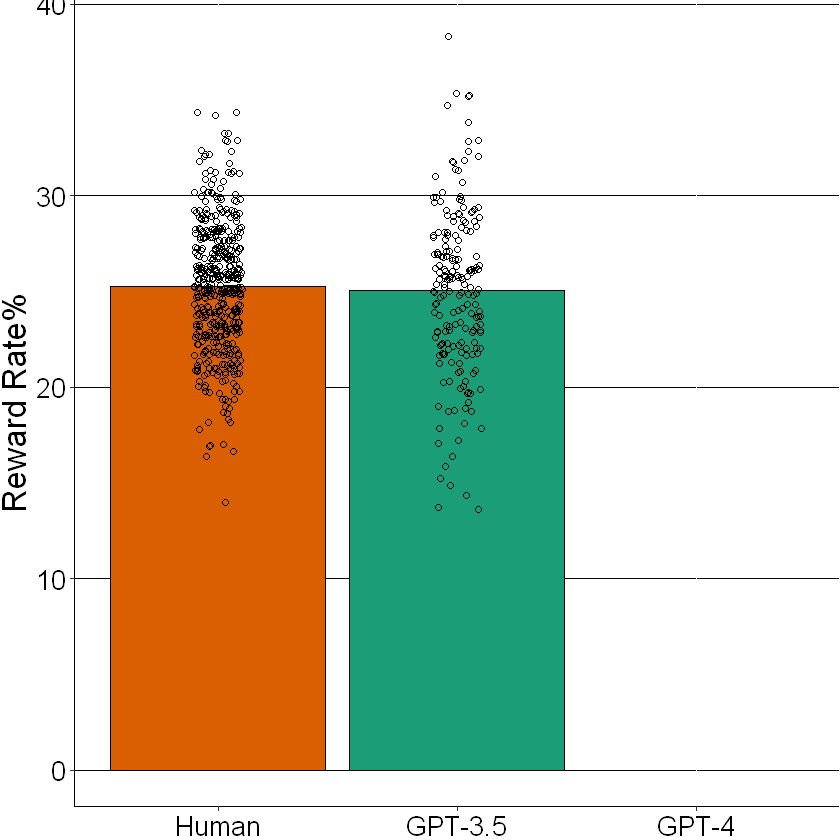

In [13]:
################## plot reward score for human and GPT ###########################
ggplot(merged_df, aes(x=subject, y=reward, fill=subject))+
  # geom_boxplot()+
  stat_summary(fun.y = "mean", geom = "bar", position = position_dodge(), color="black", size=0.2) +
  stat_summary(fun.data = mean_cl_normal, geom="linerange", colour=error_bar_colour,
               position=position_dodge(.9),  fun.args = list(mult = 1)) +
  # geom_point(color="black", position=position_nudge(x = -0.2, y = 0), alpha=0.5, size=1) +
  # geom_line(aes(group=subjID), alpha= 0.1, position=position_nudge(x = -0.2, y = 0), size=0.7) +
  geom_jitter(shape=1, position=position_jitter(0.1))+
  scale_fill_brewer(name = "", palette="Dark2", limits=c("GPT-3.5", "Human", "GPT-4")) +
  scale_x_discrete(limits = c("Human", "GPT-3.5", "GPT-4")) +
  theme_no_legend_x_title()+
  # ggtitle(title) +
  ylab("Reward Rate%")+
  theme(axis.title.y = element_text(size = 20), # Increase Y-axis label size and make it bold
        axis.text.x = element_text(size = 16), # Increase X-axis tick text size
        axis.text.y = element_text(size = 16)) # Increase legend title size
ggsave("plots/reward_score.pdf", width=10, height=10, unit="cm", useDingbats=FALSE)



Warning message:
"Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required."


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


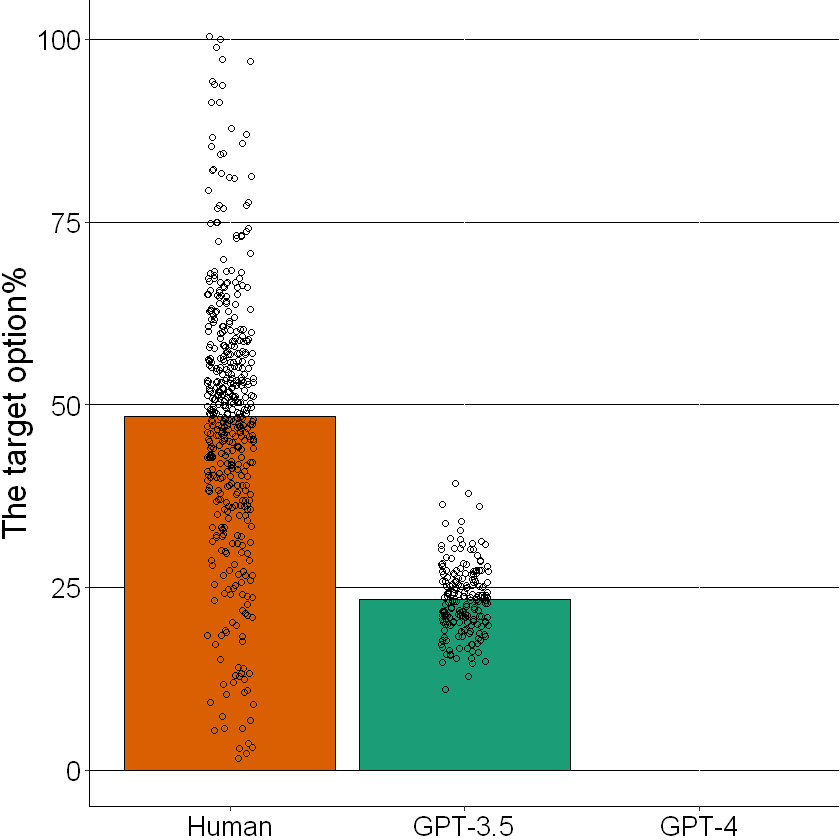

In [15]:
################## plot percentage for human and GPT ###########################
ggplot(merged_df, aes(x=subject, y=X, fill=subject))+
  # geom_boxplot()+
  stat_summary(fun.y = "mean", geom = "bar", position = position_dodge(), color="black", size=0.2) +
  stat_summary(fun.data = mean_cl_normal, geom="linerange", colour=error_bar_colour,
               position=position_dodge(.9),  fun.args = list(mult = 1)) +
  # geom_point(color="black", position=position_nudge(x = -0.2, y = 0), alpha=0.5, size=1) +
  # geom_line(aes(group=subjID), alpha= 0.1, position=position_nudge(x = -0.2, y = 0), size=0.7) +
  geom_jitter(shape=1, position=position_jitter(0.1))+
  scale_fill_brewer(name = "", palette="Dark2", limits=c("GPT-3.5", "Human", "GPT-4")) +
  scale_x_discrete(limits = c("Human", "GPT-3.5", "GPT-4")) +
  theme_no_legend_x_title()+
  # ggtitle(title) +
  ylab("The target option%")+
  theme(axis.title.y = element_text(size = 20), # Increase Y-axis label size and make it bold
        axis.text.x = element_text(size = 16), # Increase X-axis tick text size
        axis.text.y = element_text(size = 16)) # Increase legend title size
ggsave("plots/target_option.pdf", width=10, height=10, unit="cm", useDingbats=FALSE)



Warning message:
"Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required."


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


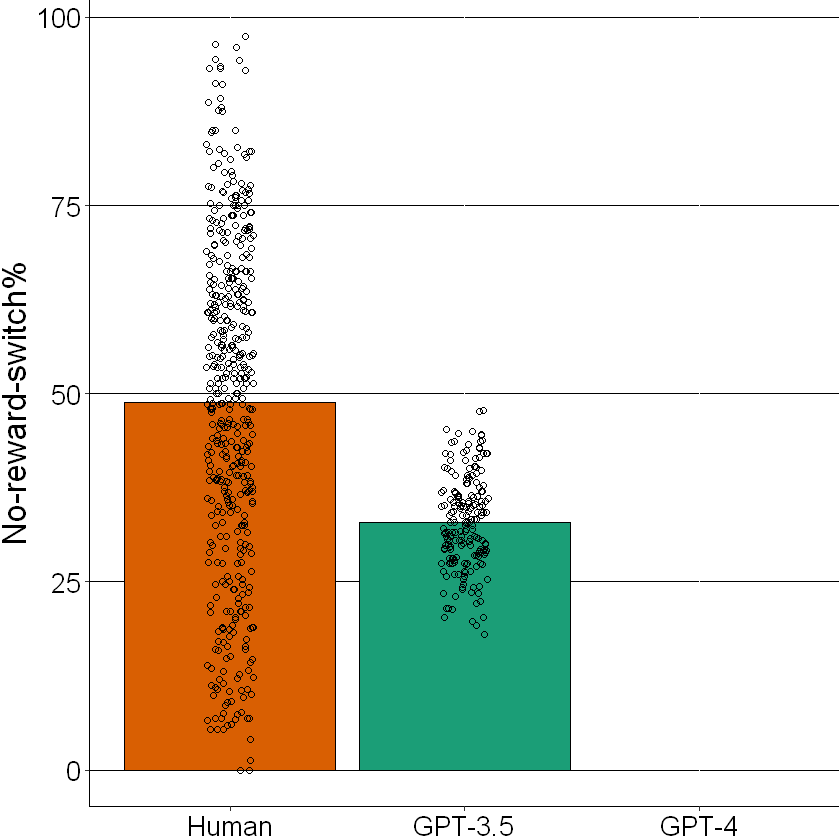

In [17]:
################## plot loss-shift for human and GPT ###########################
ggplot(merged_df, aes(x=subject, y=loss_shift*100, fill=subject))+
  # geom_boxplot()+
  stat_summary(fun.y = "mean", geom = "bar", position = position_dodge(), color="black", size=0.2) +
  stat_summary(fun.data = mean_cl_normal, geom="linerange", colour=error_bar_colour,
               position=position_dodge(.9),  fun.args = list(mult = 1)) +
  # geom_point(color="black", position=position_nudge(x = -0.2, y = 0), alpha=0.5, size=1) +
  # geom_line(aes(group=subjID), alpha= 0.1, position=position_nudge(x = -0.2, y = 0), size=0.7) +
  geom_jitter(shape=1, position=position_jitter(0.1))+
  scale_fill_brewer(name = "", palette="Dark2", limits=c("GPT-3.5", "Human", "GPT-4")) +
  scale_x_discrete(limits = c("Human", "GPT-3.5", "GPT-4")) +
  theme_no_legend_x_title()+
  # ggtitle("loss_shift") +
  ylab("No-reward-switch%")+
  theme(axis.title.y = element_text(size = 20), # Increase Y-axis label size and make it bold
        axis.text.x = element_text(size = 16), # Increase X-axis tick text size
        axis.text.y = element_text(size = 16)) # Increase legend title size
ggsave("plots/loss_shift.pdf", width=10, height=10, unit="cm", useDingbats=FALSE)



Warning message:
"Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required."


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mplots[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


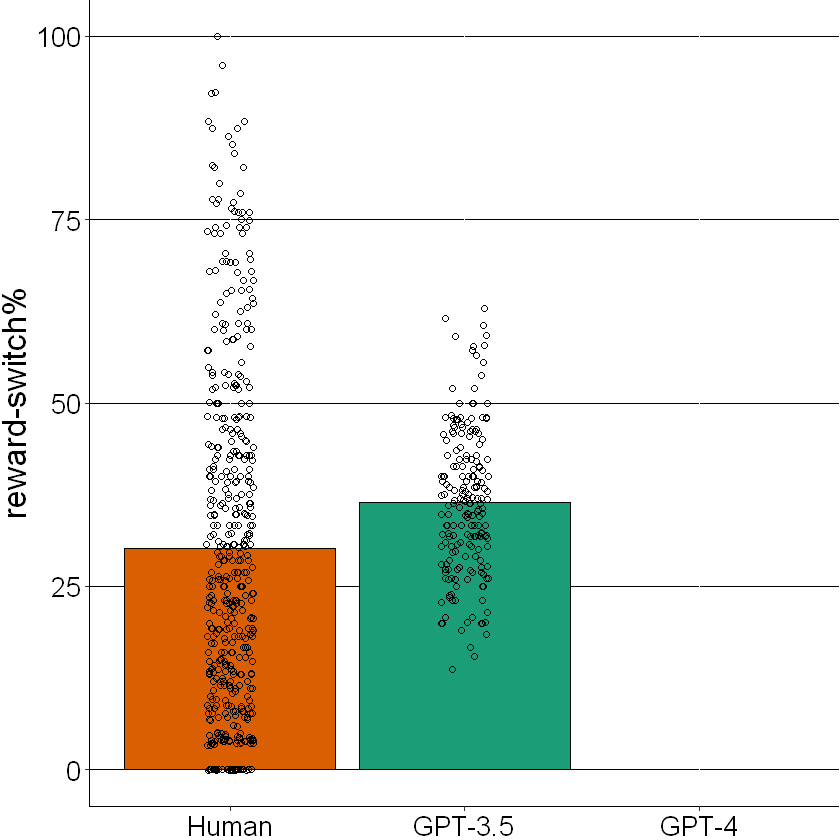

In [19]:
################## plot reward-shift for human and GPT ###########################
ggplot(merged_df, aes(x=subject, y=reward_shift*100, fill=subject))+
  # geom_boxplot()+
  stat_summary(fun.y = "mean", geom = "bar", position = position_dodge(), color="black", size=0.2) +
  stat_summary(fun.data = mean_cl_normal, geom="linerange", colour=error_bar_colour,
               position=position_dodge(.9),  fun.args = list(mult = 1)) +
  # geom_point(color="black", position=position_nudge(x = -0.2, y = 0), alpha=0.5, size=1) +
  # geom_line(aes(group=subjID), alpha= 0.1, position=position_nudge(x = -0.2, y = 0), size=0.7) +
  geom_jitter(shape=1, position=position_jitter(0.1))+
  scale_fill_brewer(name = "", palette="Dark2", limits=c("GPT-3.5", "Human", "GPT-4")) +
  scale_x_discrete(limits = c("Human", "GPT-3.5", "GPT-4")) +
  theme_no_legend_x_title()+
  # ggtitle("loss_shift") +
  ylab("reward-switch%")+
  theme(axis.title.y = element_text(size = 20), # Increase Y-axis label size and make it bold
        axis.text.x = element_text(size = 16), # Increase X-axis tick text size
        axis.text.y = element_text(size = 16)) # Increase legend title size
ggsave("plots/reward_shift.pdf", width=10, height=10, unit="cm", useDingbats=FALSE)





In [21]:
############################ t-test ########################
result <- aov(reward ~ subject, data = merged_df)
summary(result)
TukeyHSD(aov(reward ~ subject, data = merged_df))

t.test(GPT_choice_counts$X, GPT_choice_counts$Y, paired = TRUE)
t.test(GPT4_choice_counts$X, GPT4_choice_counts$Y, paired = TRUE)

calculate_switches <- function(choices) {
  # Calculate changes in choices
  switches <- sum(diff(as.numeric(as.factor(choices))) != 0)
  return(switches)
}
consistency_index <- gpt4_data %>%
  group_by(subjID) %>%
  summarise(
    Total_Switches = calculate_switches(choice),
    Trials = n(),
    Consistency_Index = 1 - (Total_Switches / (Trials - 1))  # Normalizing switches
  )
ggplot(consistency_index, aes(x = seq(1:99), y = Consistency_Index)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Consistency Index Across Simulations", x = "Simulation ID", y = "Consistency Index")

result <- aov(loss_shift ~ subject, data = merged_df)
summary(result)
TukeyHSD(aov(loss_shift ~ subject, data = merged_df))

result <- aov(reward_shift ~ subject, data = merged_df)
summary(result)
TukeyHSD(aov(reward_shift ~ subject, data = merged_df))

write.csv(merged_df, 'R/sim_data_summarization.csv', row.names = FALSE)

             Df Sum Sq Mean Sq F value Pr(>F)
subject       1      6    6.17   0.478  0.489
Residuals   682   8800   12.90               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reward ~ subject, data = merged_df)

$subject
                   diff        lwr       upr     p adj
Human-GPT-3.5 0.2088017 -0.3840673 0.8016706 0.4894841



	Paired t-test

data:  GPT_choice_counts$X and GPT_choice_counts$Y
t = -80.015, df = 199, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -54.55209 -51.92791
sample estimates:
mean difference 
         -53.24 


ERROR: Error: object 'GPT4_choice_counts' not found
